In [438]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Below is code for a single-layer perceptron classifier, along with explanations.


In [439]:
class Perceptron(): #building the neural network as a class 
    def __init__(self, dim, rate = .01, epochs = 100):
        self.epochs = epochs  #the number of epochs indicates the number of times the network cycles through the data to train itself
        self.rate = rate   #the learning rate of the network
        self.weights = np.zeros(dim + 1)  #initializes an array of zeros to contain the weights of the neural network
    def predict(self, data):
        a = np.dot(data, self.weights[1:]) + self.weights[0] #data is a row indicating the values of each characteristic for a given datapoint
                                                             #dotting the data row w/ the weights 
        return 1 if a >= 0. else 0                  #the perceptron uses a step function to make predictions
    def trainweights(self, traindata, labels):
        for n in range(self.epochs):
            for i in range(len(traindata)):   
                p = self.predict(traindata[i])    #make a prediction for the individual datapoint
                self.weights[1:] += self.rate * (labels[i] - p) * traindata[i]  #correct the weights based on the error from the actual values
                self.weights[0] += self.rate * (labels[i] - p)
                

Now that we have a neural network, let's apply it to some linearly-separable generated data. I use the np.random.multivariate_normal function to generate two 2D gaussians with different means.

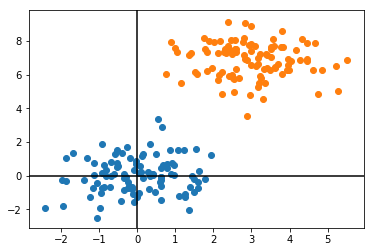

In [440]:

mean_1 = [0, 0]
cov_1 = [[1, 0], [0,1]]
mean_2 = [3, 7]
cov_2 = [[1,0], [0,1]]

x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size = 100).T

x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size = 100).T

plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.axhline(y = 0, c = 'k')
plt.axvline(x = 0, c='k')
plt.show()

the following code essentially initializes the datasets and manipulates them for reading by the neural network.

In [441]:
#create training data

group_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000)
group_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000)
labels_1 = np.ones(len(group_1))
labels_2 = np.zeros(len(group_2))

group_1 = np.c_[labels_1, group_1]
group_2 = np.c_[labels_2, group_2]


#randomly shuffle data
data = np.concatenate((group_1, group_2), axis = 0)
np.random.shuffle(data)

train_labels = data.T[0]
train_data = (data.T[1:]).T



#create test data

group_1 = np.random.multivariate_normal(mean_1, cov_1, size = 250)
group_2 = np.random.multivariate_normal(mean_2, cov_2, size = 250)
labels_1 = np.ones(len(group_1))
labels_2 = np.zeros(len(group_2))

group_1 = np.c_[labels_1, group_1]
group_2 = np.c_[labels_2, group_2]


#randomly shuffle data
data = np.concatenate((group_1, group_2), axis = 0)
np.random.shuffle(data)

test_labels = data.T[0]
test_data = (data.T[1:]).T

In [442]:
test_perceptron = Perceptron(2, rate = 0.5, epochs = 10)  #the data is 2-dimensional
test_perceptron.trainweights(train_data, train_labels)

test_size = len(test_data)

predicted_labels = np.zeros(test_size)

for i in range(test_size):
    d = test_perceptron.predict(test_data[i])
    predicted_labels[i] = d

acc = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i] == test_labels[i]:
        acc += 1
    else:
        pass

acc = acc/len(predicted_labels)

print('The neural network categorized the test data with ' + str(np.round(acc*100, 2))+ '% accuracy.')

The neural network categorized the test data with 100.0% accuracy.


visualize decision boundary:

the output of the neural network looks like

$w_1x_1 + w_2x_2 + w_0$

or $w_1x + w_2y + w_0$

set equal to 0 to find decision boundary:

$w_1x + w_2y + w_0 = 0$

$\implies y = \frac{-w_1}{w_2}x  - \frac{w_0}{w_2}$

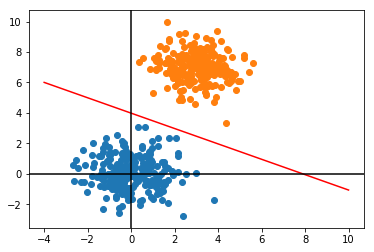

In [443]:
bias = test_perceptron.weights[0]
w1 = test_perceptron.weights[1]
w2 = test_perceptron.weights[2]

m = (-w1/w2)
b = (-bias/w2)

x1 = np.linspace(-4, 10, 1000)
y1 = m*x1 + b

x2 = group_1.T[1]
y2 = group_1.T[2]

x3 = group_2.T[1]
y3 = group_2.T[2]

plt.plot(x1, y1, c = 'r')
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.axhline(y = 0, c = 'k')
plt.axvline(x = 0, c = 'k')
plt.show()

We can see that our neural network has effectively generated a boundary with which to judge the classification of each datapoint. This production of a boundary extends to higher-dimensional datasets - a 3D dataset would have a planar boundary, etc.

Now, let's extend the neural network to look at a real, linearly separable dataset:
specifically, a dataset describing cell characteristics to determine if they are cancerous or not.
The dataset has 30 characteristics as inputs, along with an indicator if the cell is malignant or benign. The dataset is included in the repository.
(obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)/  )

I arbitrarily decided to use the first 250 datapoints to train the network and the rest to test it.
The code for applying the neural network is essentially the same as for the first dataset.

In [444]:
cancer_data = pd.read_csv('bcdata.csv')

In [445]:
train_data = np.array(cancer_data.iloc[:250, 1:])
test_data = np.array(cancer_data.iloc[251:, 1:])
train_labels = np.array(cancer_data.iloc[:250, 0])
test_labels = np.array(cancer_data.iloc[251:, 0])

In [446]:
cancer_perceptron = Perceptron(30)  #data has 30 dimensions
cancer_perceptron.trainweights(train_data, train_labels)

test_size = len(test_data)
predicted_labels = np.zeros(test_size)

for i in range(test_size):
    d = cancer_perceptron.predict(test_data[i])
    predicted_labels[i] = d

acc = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i] == test_labels[i]:
        acc += 1
    else:
        pass
    
acc = acc/len(predicted_labels)
print('The neural network categorized the test data with ' + str(np.round(acc*100, 2))+ '% accuracy.')


The neural network categorized the test data with 91.19% accuracy.


So we see that the same neural network structure used to differentiate between two very simple gaussian groups of data is
applicable to a real-world, 30 dimensional breast cancer database. This illustrates exactly how powerful neural networks are.

https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php

https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

https://archive.ics.uci.edu/ml/datasets/iris